In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x= pd.read_csv("Diabetes_XTrain.csv")
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
0                       0.787   40  
1                       0.237   58  


In [3]:
y=pd.read_csv("Diabetes_YTrain.csv")


In [4]:
print(y)
print(y.shape,x.shape)
plt.style.use("seaborn")

     Outcome
0          1
1          0
2          1
3          1
4          0
..       ...
571        0
572        1
573        0
574        0
575        0

[576 rows x 1 columns]
(576, 1) (576, 8)


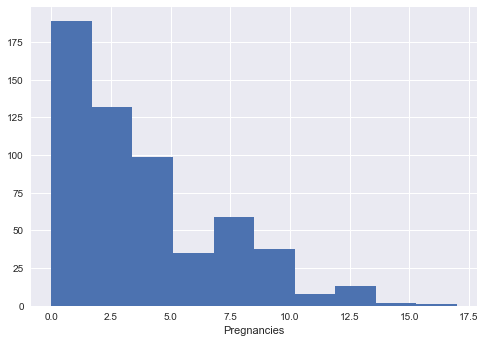

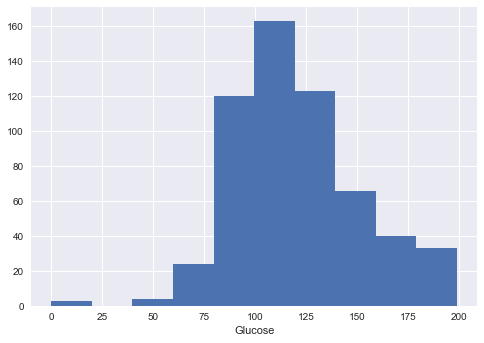

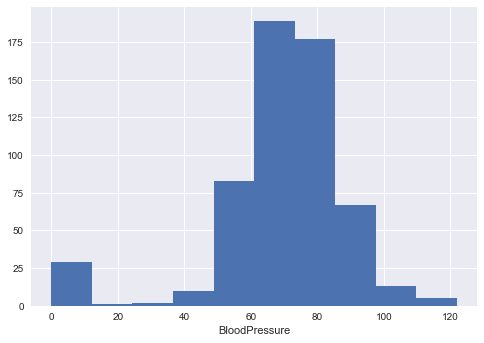

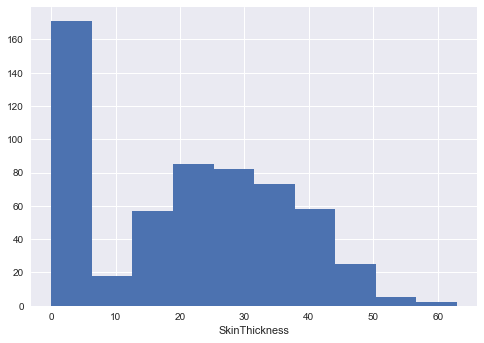

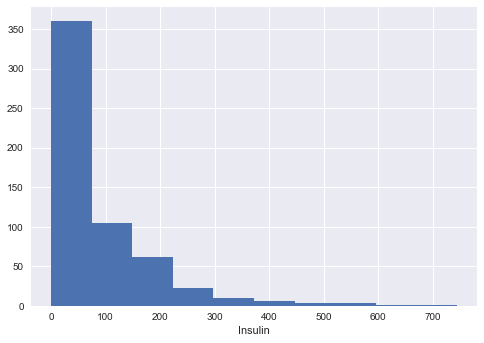

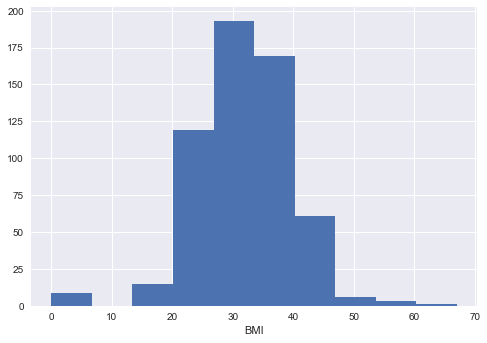

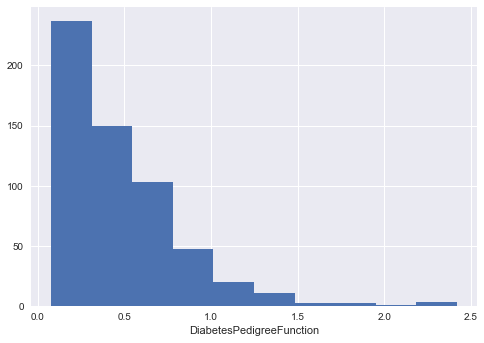

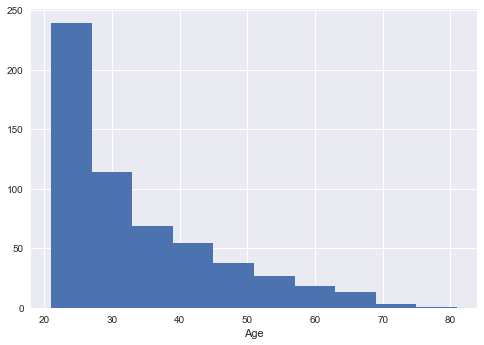

In [5]:
for i in x.columns:
    plt.hist(x[i])
    plt.xlabel(i)
    plt.show()
    

In [6]:
def dist(x1,x2):
    x1=np.array(x1)
    x2=np.array(x2)
    return np.sqrt(sum((x1-x2)**2))


In [7]:
def knn(X,y,query,k=5):
    ar=[]
    for i in range(y.shape[0]):
        d=dist(query,X[i])
        ar.append((d,y[i]))
    
    ar=sorted(ar)
    ar=ar[:k]
    ans=0
    for i in ar:
        ans+=i[1][0]
    ans/=k
    ans=round(ans)
    return ans

In [8]:
def error(X_train,y_train,X_test,y_test,k):
    ans=0
    
    for i in range(y_test.shape[0]):
        pred=knn(X_train,y_train,X_test[i],k)
        ans+=(pred-y_test[i])**2
    ans=np.sqrt(ans)
    return ans

In [9]:
size=0.8*x.shape[0]

In [10]:
size=int(size)
x=x.values
y=y.values


In [11]:
X_train=x[:size]

In [12]:
y_train=y[:size]

In [13]:
X_test=x[size:]

In [14]:
y_test=y[size:]

In [15]:
print(dist(x[0],x[0]))

0.0


In [16]:
print(knn(X_train,y_train,x[0]))

1.0


In [17]:
print(error(X_train,y_train,X_test,y_test,1))

[6.63324958]


1 [6.63324958]
2 [6.08276253]
3 [6.244998]
4 [5.83095189]
5 [6.164414]
6 [5.83095189]
7 [5.91607978]
8 [5.83095189]
9 [5.74456265]
10 [5.74456265]
11 [5.83095189]
12 [5.74456265]
13 [5.91607978]
14 [5.56776436]
15 [5.47722558]
16 [5.65685425]
17 [5.65685425]
18 [5.47722558]
19 [5.56776436]
20 [5.65685425]
21 [5.83095189]
22 [6.]
23 [6.08276253]
24 [6.164414]
25 [6.164414]
26 [6.08276253]
27 [6.244998]
28 [5.74456265]
29 [6.]


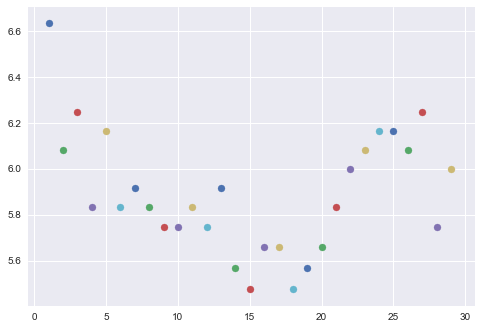

In [32]:
for i in range(1,30):
    print(i,error(X_train,y_train,X_test,y_test,i))
    plt.scatter(i,error(X_train,y_train,X_test,y_test,i))
plt.show()

In [33]:
mink=13

In [34]:
tc= pd.read_csv("Diabetes_Xtest.csv")

In [35]:
tc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22
...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42
188,3,130,64,0,0,23.1,0.314,22
189,0,162,76,36,0,49.6,0.364,26
190,12,84,72,31,0,29.7,0.297,46


In [36]:
tc=tc.values

In [37]:
tc

array([[0.00e+00, 1.80e+02, 9.00e+01, ..., 3.65e+01, 3.14e-01, 3.50e+01],
       [2.00e+00, 9.30e+01, 6.40e+01, ..., 3.80e+01, 6.74e-01, 2.30e+01],
       [2.00e+00, 1.14e+02, 6.80e+01, ..., 2.87e+01, 9.20e-02, 2.50e+01],
       ...,
       [0.00e+00, 1.62e+02, 7.60e+01, ..., 4.96e+01, 3.64e-01, 2.60e+01],
       [1.20e+01, 8.40e+01, 7.20e+01, ..., 2.97e+01, 2.97e-01, 4.60e+01],
       [0.00e+00, 9.40e+01, 0.00e+00, ..., 0.00e+00, 2.56e-01, 2.50e+01]])

In [38]:
ans=[]

for i in range(192):
    ans.append(int((knn(x,y,tc[i],15))))

In [39]:
ans

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [40]:
ans=pd.DataFrame(ans)

In [41]:
ans.columns=["Outcome"]

In [42]:
ans

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


In [43]:
ans.to_csv("ans1.csv",index=False)